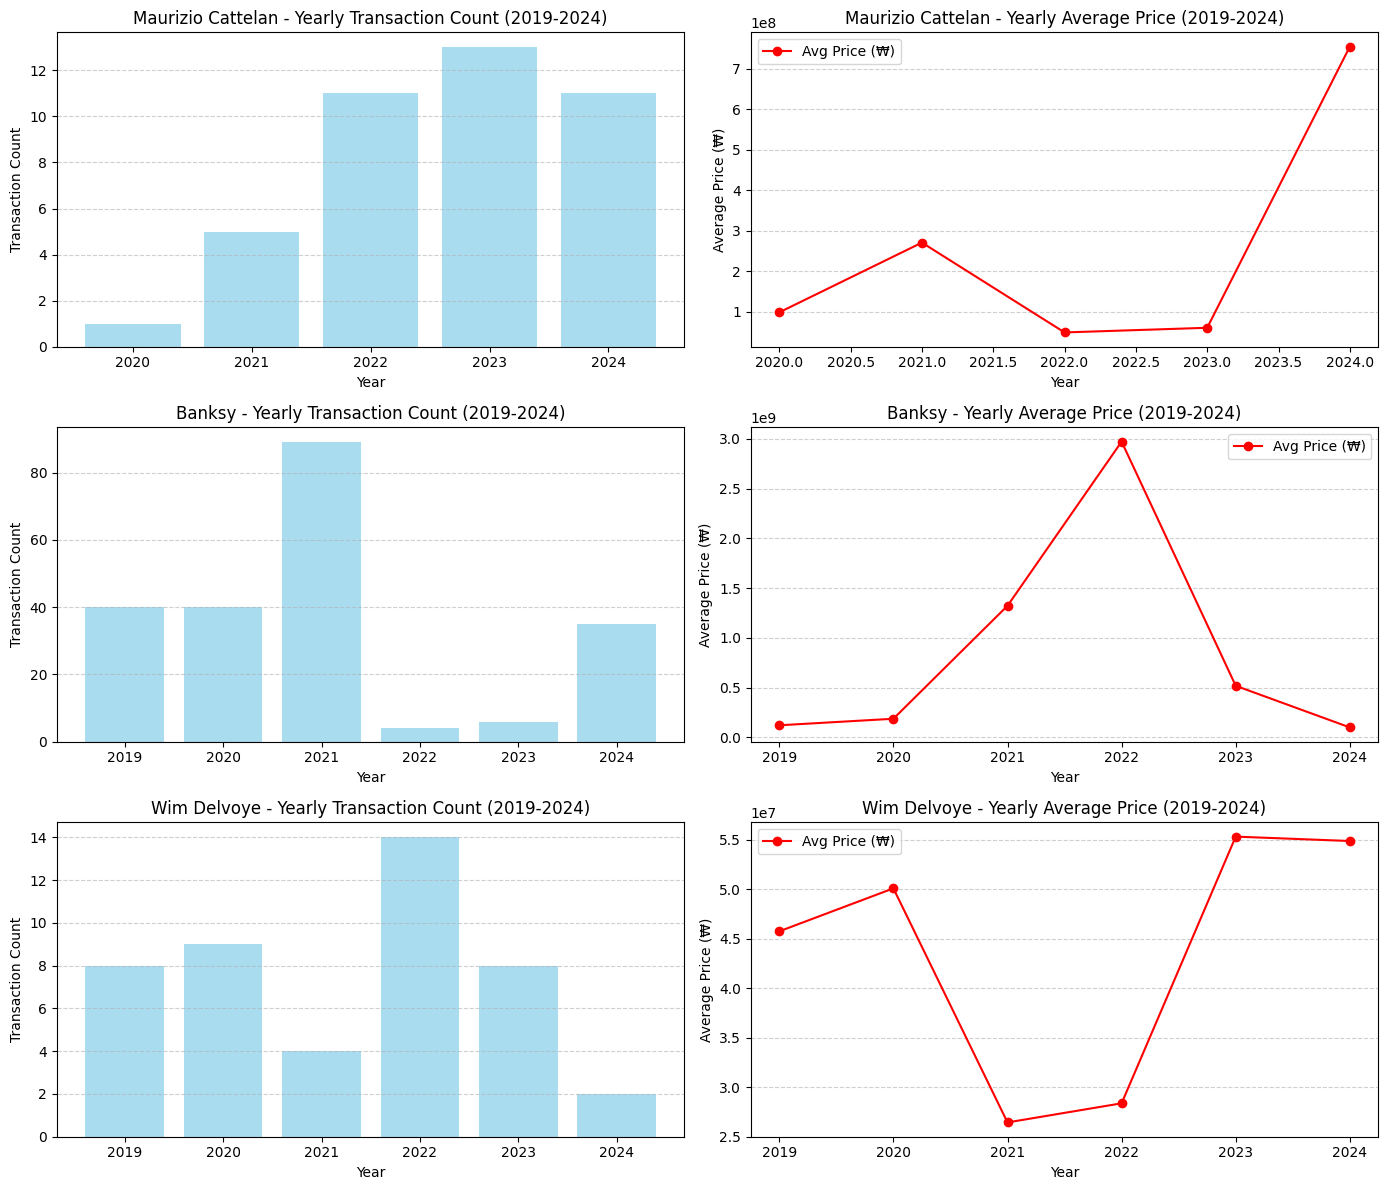

ModuleNotFoundError: No module named 'ace_tools'

In [4]:
# 빔 델보예

import pandas as pd
import matplotlib.pyplot as plt

# 🔹 파일 경로 설정
file_paths = {
    "Maurizio Cattelan": "C:\src\data_python\\auction_data (Maurizio Cattelan).xlsx",
    "Banksy": "C:\src\data_python\\auction_data (Banksy).xlsx",
    "Wim Delvoye": "C:\src\data_python\\auction_data(WimDelvoye).xlsx"
}

# 🔹 각 데이터셋에서 사용해야 할 날짜 및 가격 컬럼
date_columns = {
    "Maurizio Cattelan": "date",
    "Banksy": "date",
    "Wim Delvoye": "Auction Date"  # 날짜 컬럼명이 다름
}

price_columns = {
    "Maurizio Cattelan": "KRW",
    "Banksy": "price",
    "Wim Delvoye": "price_krw"
}

# 🔹 데이터 불러오기 및 변환 (올바른 날짜 및 가격 컬럼 사용)
dfs = {}
for artist, path in file_paths.items():
    df = pd.read_excel(path, sheet_name="Sheet1")
    
    # 날짜 및 가격 변환
    date_col = date_columns[artist]
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    price_col = price_columns[artist]
    df[price_col] = pd.to_numeric(df[price_col].astype(str).str.replace(",", ""), errors="coerce")
    
    # 2019년 6월 ~ 2024년 12월 데이터 필터링
    start_date = pd.Timestamp("2019-06-01")
    end_date = pd.Timestamp("2024-12-31")
    df_filtered = df[(df[date_col] >= start_date) & (df[date_col] <= end_date)]
    
    # 연도별 거래량 및 평균 가격 계산 (올바른 날짜 및 가격 컬럼 사용)
    yearly_summary = df_filtered.groupby(df_filtered[date_col].dt.year).agg(
        transaction_count=(price_col, 'count'),
        avg_price=(price_col, 'mean')
    ).reset_index().rename(columns={date_col: "year"})

    # 연도별 변화율 추가 계산
    yearly_summary["transaction_count_change (%)"] = yearly_summary["transaction_count"].pct_change() * 100
    yearly_summary["avg_price_change (%)"] = yearly_summary["avg_price"].pct_change() * 100

    # 데이터 저장
    dfs[artist] = yearly_summary

# 🔹 개별 그래프 생성 (각 작가별 시각화)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3명의 작가, 2개의 그래프씩

for idx, (artist, summary) in enumerate(dfs.items()):
    # 거래량 그래프
    axes[idx, 0].bar(summary["year"], summary["transaction_count"], color='skyblue', alpha=0.7)
    axes[idx, 0].set_xlabel("Year")
    axes[idx, 0].set_ylabel("Transaction Count")
    axes[idx, 0].set_title(f"{artist} - Yearly Transaction Count (2019-2024)")
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.6)
    
    # 평균 가격 그래프
    axes[idx, 1].plot(summary["year"], summary["avg_price"], marker='o', linestyle='-', color='red', label="Avg Price (₩)")
    axes[idx, 1].set_xlabel("Year")
    axes[idx, 1].set_ylabel("Average Price (₩)")
    axes[idx, 1].set_title(f"{artist} - Yearly Average Price (2019-2024)")
    axes[idx, 1].legend()
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.6)



plt.tight_layout()
plt.show()

# 🔹 세 작가의 데이터 비교용 데이터프레임 출력
import ace_tools as tools
comparison_df = pd.concat(dfs, names=["Artist"]).reset_index(level=0)
tools.display_dataframe_to_user(name="세 작가 연도별 거래량 및 평균 가격 비교", dataframe=comparison_df)

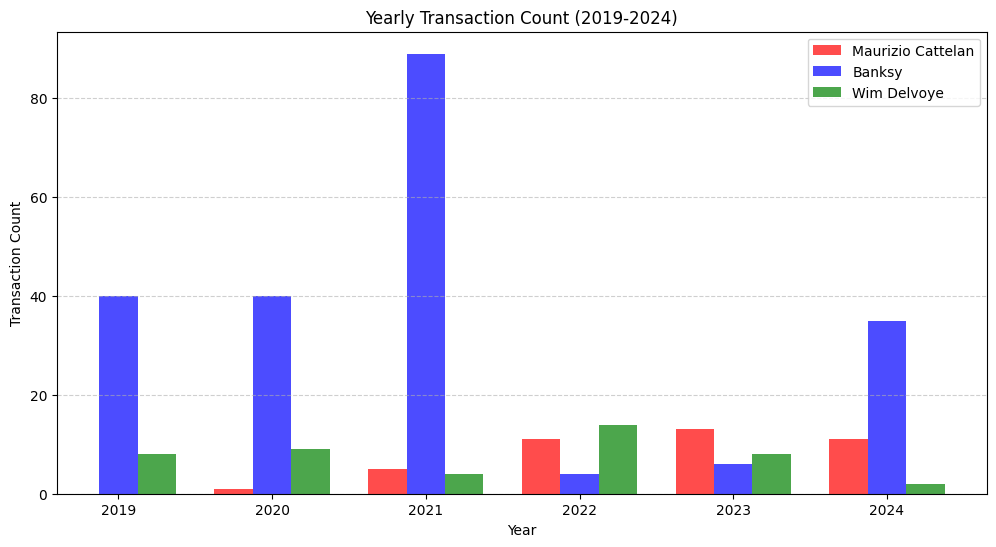

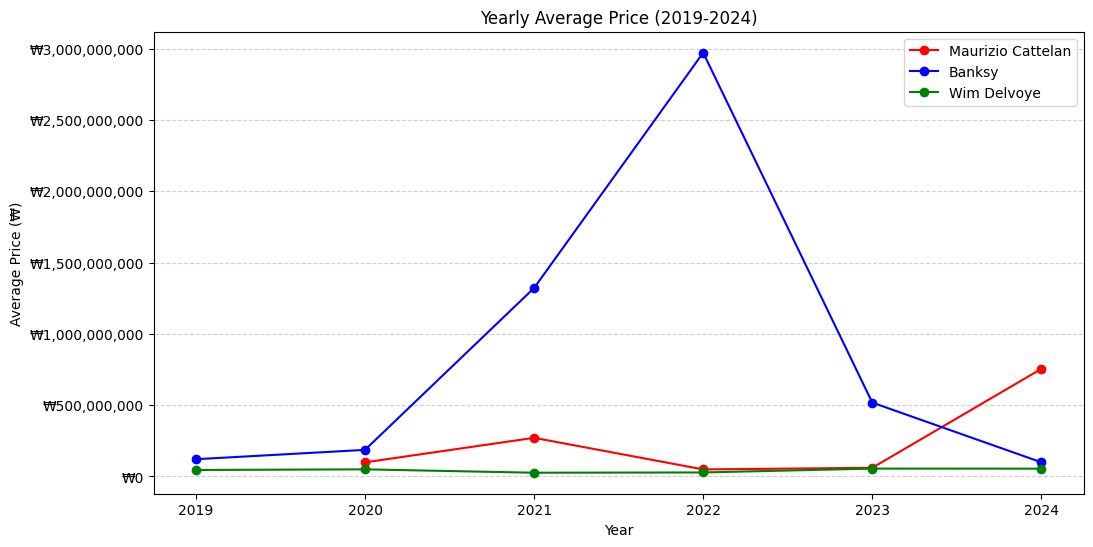

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 🎨 색상 설정 (각 작가별 고유 색상)
colors = {
    "Maurizio Cattelan": "red",
    "Banksy": "blue",
    "Wim Delvoye": "green"
}

# 🎨 원화 포맷 함수 (천 단위 쉼표 추가)
def format_won(x, pos):
    return f"₩{x:,.0f}"  # ₩ 기호 + 천 단위 쉼표 포함

# 🔹 거래량 비교 (막대그래프)
plt.figure(figsize=(12, 6))
width = 0.25  # 막대 너비 조정
years = sorted(set(dfs["Maurizio Cattelan"]["year"]).union(
               set(dfs["Banksy"]["year"])).union(
               set(dfs["Wim Delvoye"]["year"])))

for i, (artist, summary) in enumerate(dfs.items()):
    plt.bar([y + (i-1)*width for y in summary["year"]], summary["transaction_count"],
            width=width, color=colors[artist], alpha=0.7, label=f"{artist}")

plt.xlabel("Year")
plt.ylabel("Transaction Count")
plt.title("Yearly Transaction Count (2019-2024)")
plt.xticks(years)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 🔹 평균 가격 비교 (선 그래프, ₩ 단위 그대로 출력)
plt.figure(figsize=(12, 6))
for artist, summary in dfs.items():
    plt.plot(summary["year"], summary["avg_price"], marker='o', linestyle='-', 
             color=colors[artist], label=f"{artist}")

plt.xlabel("Year")
plt.ylabel("Average Price (₩)")
plt.title("Yearly Average Price (2019-2024)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 🔹 원화 포맷 적용 (ticklabel_format 제거)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_won))

plt.show()


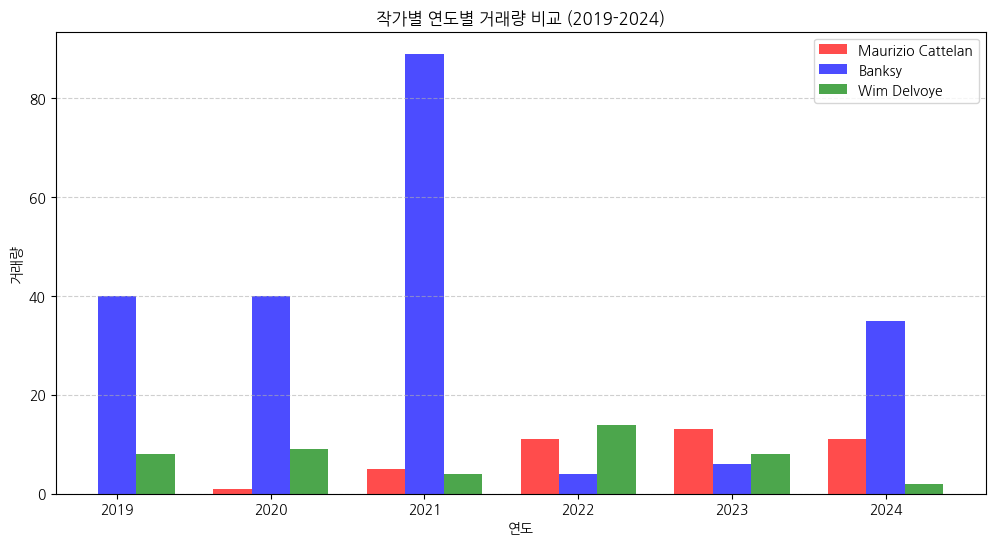

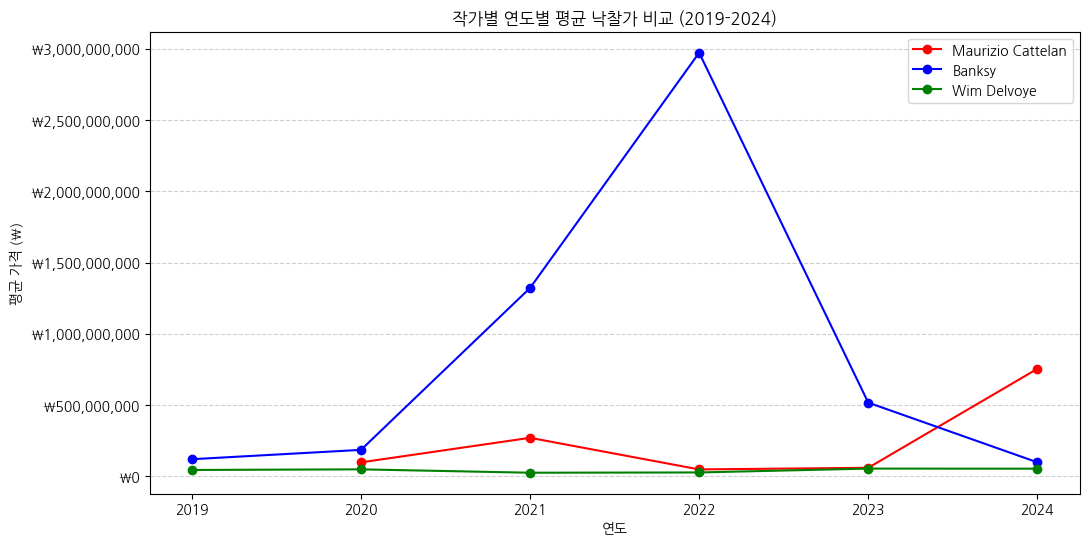

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 🎨 한글 폰트 적용
plt.rcParams['font.family'] = 'NanumGothic'  # 윈도우: 'Malgun Gothic', Mac: 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 🎨 색상 설정 (각 작가별 고유 색상)
colors = {
    "Maurizio Cattelan": "red",
    "Banksy": "blue",
    "Wim Delvoye": "green"
}

# 🎨 원화 포맷 함수 (천 단위 쉼표 추가)
def format_won(x, pos):
    return f"₩{x:,.0f}"  # ₩ 기호 + 천 단위 쉼표 포함

# 🔹 거래량 비교 (막대그래프)
plt.figure(figsize=(12, 6))
width = 0.25  # 막대 너비 조정
years = sorted(set(dfs["Maurizio Cattelan"]["year"]).union(
               set(dfs["Banksy"]["year"])).union(
               set(dfs["Wim Delvoye"]["year"])))

for i, (artist, summary) in enumerate(dfs.items()):
    plt.bar([y + (i-1)*width for y in summary["year"]], summary["transaction_count"],
            width=width, color=colors[artist], alpha=0.7, label=f"{artist}")

plt.xlabel("연도")
plt.ylabel("거래량")
plt.title("작가별 연도별 거래량 비교 (2019-2024)")
plt.xticks(years)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 🔹 평균 가격 비교 (선 그래프, ₩ 단위 그대로 출력)
plt.figure(figsize=(12, 6))
for artist, summary in dfs.items():
    plt.plot(summary["year"], summary["avg_price"], marker='o', linestyle='-', 
             color=colors[artist], label=f"{artist}")

plt.xlabel("연도")
plt.ylabel("평균 가격 (₩)")
plt.title("작가별 연도별 평균 낙찰가 비교 (2019-2024)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 🔹 원화 포맷 적용
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_won))

plt.show()
